# Advanced NN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

data_dir = '/content/drive/MyDrive/NN심화 강의자료/'

# 데이터 확인

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

데이터 출처: https://github.com/zalandoresearch/fashion-mnist

In [4]:
Train = pd.read_csv(data_dir + 'Train.csv')
Test = pd.read_csv(data_dir + 'Test.csv')
submission = pd.read_csv(data_dir + 'submission.csv')

In [5]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [6]:
Train['label'].nunique()


10

In [7]:
Test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [8]:
submission.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [9]:
X = Train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = Train.iloc[:, -1].values

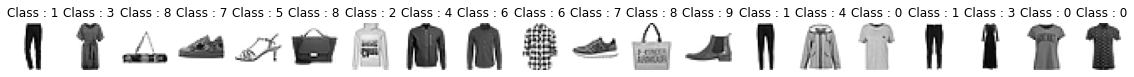

In [10]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [11]:
X_test = Test.values
X_test = X_test.reshape(-1, 28, 28, 1)

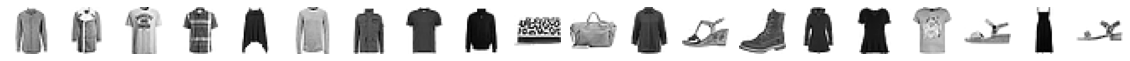

In [12]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

# 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Simple DNN

DNN(Deep Neural Network)
ANN문제해결을 위해 은닉층 확대한 모델
( 2개이상의 은닉층)

<->CNN의 경우 convolution과정과 pooling과정으로 이루어진 것이 특징

In [14]:
BATCH_SIZE = 128
EPOCHS = 15

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #1차원으로
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.4056 - accuracy: 0.8557 - val_loss: 0.4230 - val_accuracy: 0.8524
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3979 - accuracy: 0.8603 - val_loss: 0.4206 - val_accuracy: 0.8546
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3950 - accuracy: 0.8601 - val_loss: 0.4206 - val_accuracy: 0.8576
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3922 - accuracy: 0.8611 - val_loss: 0.4147 - val_accuracy: 0.8610
Epoch 5/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3903 - accuracy: 0.8628 - val_loss: 0.4142 - val_accuracy: 0.8576
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3901 - accuracy: 0.8621 - val_loss: 0.4346 - val_accuracy: 0.8473
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3888 - accuracy: 0.8624 - val_loss: 0.4207 - val_accuracy:

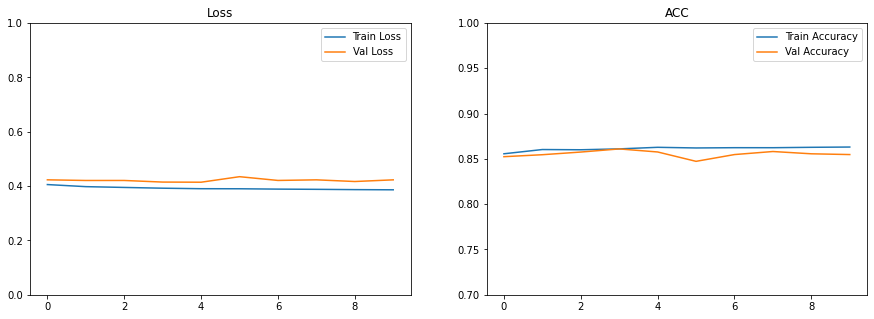

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Activation Function

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.6416 - accuracy: 0.7823 - val_loss: 0.4552 - val_accuracy: 0.8419
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4443 - accuracy: 0.8414 - val_loss: 0.4005 - val_accuracy: 0.8595
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3972 - accuracy: 0.8568 - val_loss: 0.3702 - val_accuracy: 0.8674
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3699 - accuracy: 0.8658 - val_loss: 0.3727 - val_accuracy: 0.8677
Epoch 5/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.3472 - accuracy: 0.8721 - val_loss: 0.3433 - val_accuracy: 0.8766
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3301 - accuracy: 0.8778 - val_loss: 0.3782 - val_accuracy: 0.8581
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3145 - accuracy: 0.8838 - val_loss: 0.3340 - val_accuracy:

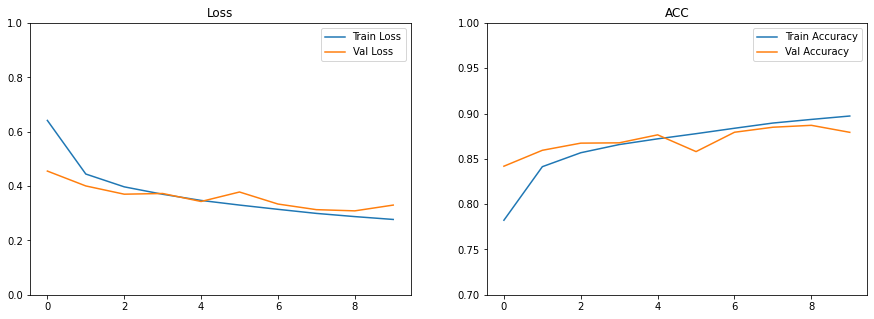

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Weight Initialization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.5944 - accuracy: 0.7955 - val_loss: 0.4328 - val_accuracy: 0.8467
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4271 - accuracy: 0.8486 - val_loss: 0.3783 - val_accuracy: 0.8657
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3820 - accuracy: 0.8636 - val_loss: 0.3915 - val_accuracy: 0.8591
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3549 - accuracy: 0.8702 - val_loss: 0.3521 - val_accuracy: 0.8735
Epoch 5/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3323 - accuracy: 0.8783 - val_loss: 0.3372 - val_accuracy: 0.8755
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3147 - accuracy: 0.8850 - val_loss: 0.3355 - val_accuracy: 0.8789
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3007 - accuracy: 0.8886 - val_loss: 0.3188 - val_accuracy:

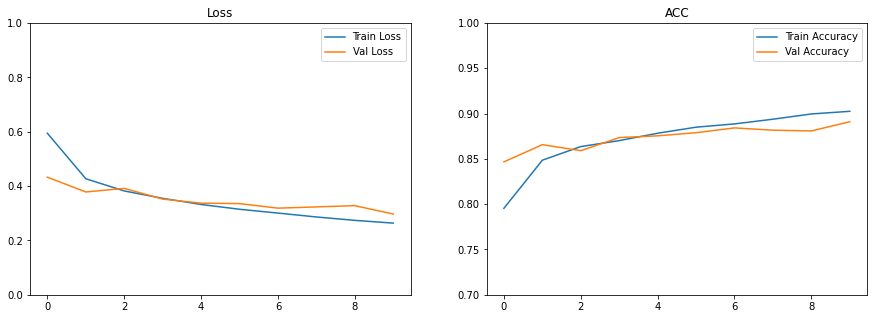

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Batch Normalization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)              

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5391 - accuracy: 0.8141 - val_loss: 0.3948 - val_accuracy: 0.8575
Epoch 2/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3868 - accuracy: 0.8612 - val_loss: 0.3740 - val_accuracy: 0.8618
Epoch 3/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3391 - accuracy: 0.8780 - val_loss: 0.3317 - val_accuracy: 0.8779
Epoch 4/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3057 - accuracy: 0.8895 - val_loss: 0.3354 - val_accuracy: 0.8767
Epoch 5/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.2805 - accuracy: 0.8979 - val_loss: 0.3111 - val_accuracy: 0.8847
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2591 - accuracy: 0.9051 - val_loss: 0.3084 - val_accuracy: 0.8869
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2372 - accuracy: 0.9127 - val_loss: 0.3575 - val_ac

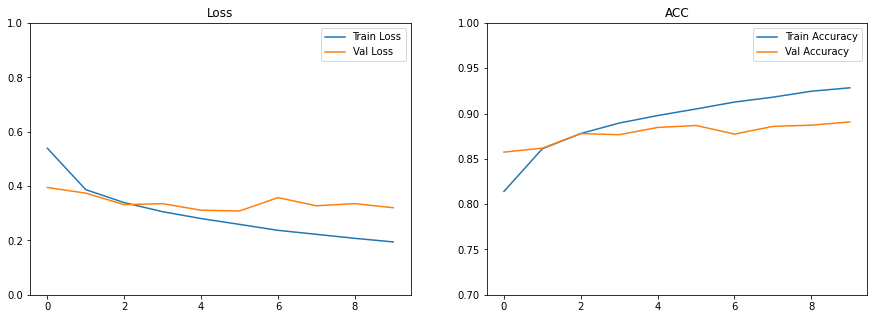

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Optimization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)              

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5515 - accuracy: 0.8021 - val_loss: 0.4283 - val_accuracy: 0.8382
Epoch 2/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.4205 - accuracy: 0.8459 - val_loss: 0.3894 - val_accuracy: 0.8584
Epoch 3/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3843 - accuracy: 0.8595 - val_loss: 0.3837 - val_accuracy: 0.8573
Epoch 4/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3540 - accuracy: 0.8699 - val_loss: 0.3714 - val_accuracy: 0.8679
Epoch 5/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3281 - accuracy: 0.8781 - val_loss: 0.3353 - val_accuracy: 0.8750
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3107 - accuracy: 0.8838 - val_loss: 0.3163 - val_accuracy: 0.8856
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2916 - accuracy: 0.8907 - val_loss: 0.3116 - val_ac

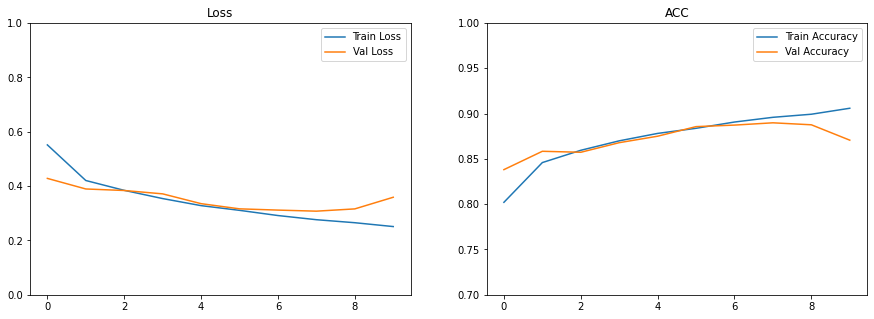

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Dropout

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)              

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 12s 7ms/step - loss: 0.5989 - accuracy: 0.7855 - val_loss: 0.5030 - val_accuracy: 0.8215
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4761 - accuracy: 0.8292 - val_loss: 0.3918 - val_accuracy: 0.8485
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4311 - accuracy: 0.8480 - val_loss: 0.3755 - val_accuracy: 0.8616
Epoch 4/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4053 - accuracy: 0.8521 - val_loss: 0.3447 - val_accuracy: 0.8771
Epoch 5/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3857 - accuracy: 0.8597 - val_loss: 0.3261 - val_accuracy: 0.8814
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3662 - accuracy: 0.8674 - val_loss: 0.3293 - val_accuracy: 0.8804
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3528 - accuracy: 0.8719 - val_loss: 0.3277 - val_ac

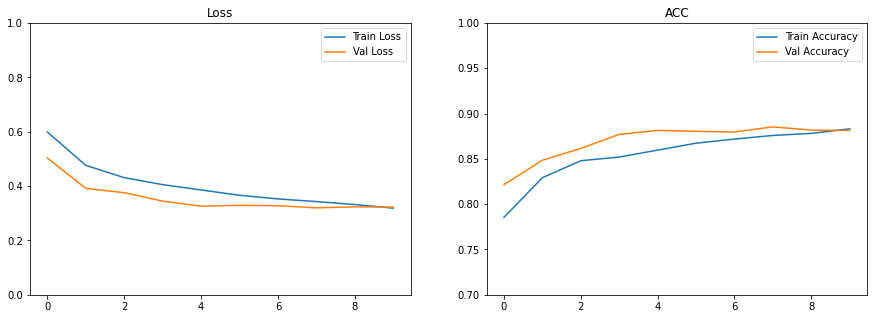

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Regularization

In [ ]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)              

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5652 - accuracy: 0.7971 - val_loss: 0.4074 - val_accuracy: 0.8450
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4193 - accuracy: 0.8475 - val_loss: 0.3289 - val_accuracy: 0.8771
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3698 - accuracy: 0.8660 - val_loss: 0.3053 - val_accuracy: 0.8858
Epoch 4/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3336 - accuracy: 0.8766 - val_loss: 0.3056 - val_accuracy: 0.8887
Epoch 5/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3158 - accuracy: 0.8827 - val_loss: 0.3019 - val_accuracy: 0.8903
Epoch 6/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2937 - accuracy: 0.8909 - val_loss: 0.2779 - val_accuracy: 0.8962
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2789 - accuracy: 0.8967 - val_loss: 0.2742 - val_ac

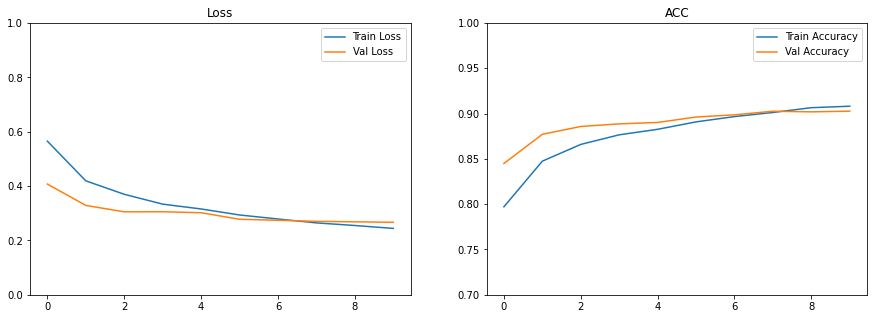

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# 제출1

최종 val_loss=0.5443
val_accuracy=0.9103

시도1_활성화 함수 gelu
val_loss=0.6550(상승)
/val_accuracy=0.9096(정체)

시도2_dropout(0.1~0.5조정)
val_loss=0.6639(상승)
/val_accuracy=0.9124(정체)

시도3_은닉층 늘리기

val_loss=0.5550
/val_accuracy=0.9082

**시도4_CNN적용**

val_loss=0.271
/val_accuracy=0.9265

In [58]:
from tensorflow import keras

BATCH_SIZE = 128
EPOCHS = 100

In [85]:
from tensorflow.keras import layers 

inputs = keras.Input(shape=(28, 28, 1)) 
x = layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="valid")(inputs)
x = layers.AveragePooling2D(pool_size=2)(x) 
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="valid")(x)
x = layers.AveragePooling2D(pool_size=2)(x) 
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) 
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs=inputs, outputs=outputs)

In [86]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 22, 22, 64)        3200      
                                                                 
 average_pooling2d_30 (Avera  (None, 11, 11, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_53 (Bat  (None, 11, 11, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_43 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_54 (Conv2D)          (None, 9, 9, 128)         7385

In [87]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_sparse_categorical_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=10,         
                             )

result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE,callbacks=[cp_callback, earlystopping])

Epoch 1/100
372/372 [==============================] - 4s 8ms/step - loss: 0.8107 - accuracy: 0.7078 - val_loss: 1.3905 - val_accuracy: 0.4565
Epoch 2/100
372/372 [==============================] - 3s 8ms/step - loss: 0.5730 - accuracy: 0.7896 - val_loss: 0.4473 - val_accuracy: 0.8334
Epoch 3/100
372/372 [==============================] - 3s 8ms/step - loss: 0.5144 - accuracy: 0.8110 - val_loss: 0.3701 - val_accuracy: 0.8699
Epoch 4/100
372/372 [==============================] - 3s 8ms/step - loss: 0.4774 - accuracy: 0.8259 - val_loss: 0.3662 - val_accuracy: 0.8711
Epoch 5/100
372/372 [==============================] - 3s 8ms/step - loss: 0.4526 - accuracy: 0.8356 - val_loss: 0.3461 - val_accuracy: 0.8727
Epoch 6/100
372/372 [==============================] - 3s 8ms/step - loss: 0.4257 - accuracy: 0.8446 - val_loss: 0.3433 - val_accuracy: 0.8755
Epoch 7/100
372/372 [==============================] - 3s 9ms/step - loss: 0.4082 - accuracy: 0.8524 - val_loss: 0.3235 - val_accuracy: 0.8818

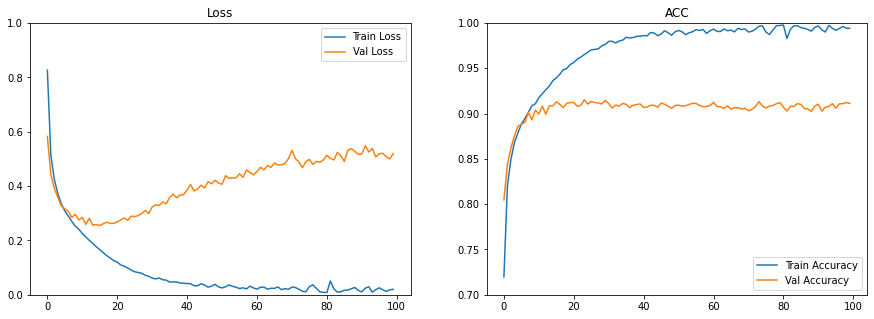

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

In [ ]:
pred_label = np.argmax(model.predict(X_test), axis = 1)

submission['label'] = pred_label

submission.to_csv(data_dir + 'BaseLine_Model.csv', index = False)

submission.head()

,id,label
0,0,6
1,1,4
2,2,0
3,3,0
4,4,6


#제출2

In [17]:
from tensorflow import keras

BATCH_SIZE = 128
EPOCHS = 100

In [32]:
from tensorflow.keras import layers 

inputs = keras.Input(shape=(28, 28, 1)) 
x = layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="valid")(inputs)
x = layers.AveragePooling2D(pool_size=2)(x) 
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="valid")(x)
x = layers.AveragePooling2D(pool_size=2)(x) 
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) 

x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs=inputs, outputs=outputs)

In [33]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_sparse_categorical_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=10,         
                             )

result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE,callbacks=[cp_callback, earlystopping])

Epoch 1/100
369/372 [============================>.] - ETA: 0s - loss: 0.8592 - accuracy: 0.6909

372/372 [==============================] - 4s 9ms/step - loss: 0.8573 - accuracy: 0.6918 - val_loss: 1.1948 - val_accuracy: 0.5466
Epoch 2/100
372/372 [==============================] - ETA: 0s - loss: 0.5746 - accuracy: 0.7891

372/372 [==============================] - 3s 9ms/step - loss: 0.5746 - accuracy: 0.7891 - val_loss: 0.4550 - val_accuracy: 0.8266
Epoch 3/100
366/372 [============================>.] - ETA: 0s - loss: 0.5102 - accuracy: 0.8149

372/372 [==============================] - 3s 8ms/step - loss: 0.5096 - accuracy: 0.8152 - val_loss: 0.3796 - val_accuracy: 0.8578
Epoch 4/100
371/372 [============================>.] - ETA: 0s - loss: 0.4687 - accuracy: 0.8295

372/372 [==============================] - 3s 8ms/step - loss: 0.4688 - accuracy: 0.8295 - val_loss: 0.3653 - val_accuracy: 0.8651
Epoch 5/100
368/372 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.8439

372/372 [==============================] - 3s 8ms/step - loss: 0.4390 - accuracy: 0.8437 - val_loss: 0.3577 - val_accuracy: 0.8659
Epoch 6/100
372/372 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8492

372/372 [==============================] - 3s 8ms/step - loss: 0.4251 - accuracy: 0.8492 - val_loss: 0.3433 - val_accuracy: 0.8734
Epoch 7/100
372/372 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8545

372/372 [==============================] - 3s 8ms/step - loss: 0.4044 - accuracy: 0.8545 - val_loss: 0.3280 - val_accuracy: 0.8797
Epoch 8/100
366/372 [============================>.] - ETA: 0s - loss: 0.3889 - accuracy: 0.8597

372/372 [==============================] - 3s 8ms/step - loss: 0.3895 - accuracy: 0.8594 - val_loss: 0.3362 - val_accuracy: 0.8787
Epoch 9/100
367/372 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8619

372/372 [==============================] - 3s 8ms/step - loss: 0.3841 - accuracy: 0.8618 - val_loss: 0.3282 - val_accuracy: 0.8859
Epoch 10/100
366/372 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.8658

372/372 [==============================] - 3s 8ms/step - loss: 0.3690 - accuracy: 0.8661 - val_loss: 0.3230 - val_accuracy: 0.8792
Epoch 11/100
367/372 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8711

372/372 [==============================] - 3s 8ms/step - loss: 0.3563 - accuracy: 0.8712 - val_loss: 0.3007 - val_accuracy: 0.8972
Epoch 12/100
367/372 [============================>.] - ETA: 0s - loss: 0.3497 - accuracy: 0.8733

372/372 [==============================] - 3s 8ms/step - loss: 0.3490 - accuracy: 0.8736 - val_loss: 0.2928 - val_accuracy: 0.8992
Epoch 13/100
365/372 [============================>.] - ETA: 0s - loss: 0.3464 - accuracy: 0.8753

372/372 [==============================] - 3s 8ms/step - loss: 0.3453 - accuracy: 0.8755 - val_loss: 0.2961 - val_accuracy: 0.8962
Epoch 14/100
365/372 [============================>.] - ETA: 0s - loss: 0.3350 - accuracy: 0.8793

372/372 [==============================] - 3s 8ms/step - loss: 0.3341 - accuracy: 0.8796 - val_loss: 0.2973 - val_accuracy: 0.8950
Epoch 15/100
366/372 [============================>.] - ETA: 0s - loss: 0.3321 - accuracy: 0.8794

372/372 [==============================] - 3s 8ms/step - loss: 0.3318 - accuracy: 0.8793 - val_loss: 0.2823 - val_accuracy: 0.9016
Epoch 16/100
368/372 [============================>.] - ETA: 0s - loss: 0.3257 - accuracy: 0.8830

372/372 [==============================] - 3s 8ms/step - loss: 0.3257 - accuracy: 0.8829 - val_loss: 0.2916 - val_accuracy: 0.8924
Epoch 17/100
372/372 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.8843

372/372 [==============================] - 3s 8ms/step - loss: 0.3240 - accuracy: 0.8843 - val_loss: 0.2915 - val_accuracy: 0.8918
Epoch 18/100
369/372 [============================>.] - ETA: 0s - loss: 0.3157 - accuracy: 0.8850

372/372 [==============================] - 3s 8ms/step - loss: 0.3154 - accuracy: 0.8850 - val_loss: 0.2878 - val_accuracy: 0.8922
Epoch 19/100
370/372 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8878

372/372 [==============================] - 4s 10ms/step - loss: 0.3108 - accuracy: 0.8878 - val_loss: 0.2805 - val_accuracy: 0.9008
Epoch 20/100
371/372 [============================>.] - ETA: 0s - loss: 0.3044 - accuracy: 0.8901

372/372 [==============================] - 3s 8ms/step - loss: 0.3043 - accuracy: 0.8901 - val_loss: 0.2825 - val_accuracy: 0.9017
Epoch 21/100
366/372 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8925

372/372 [==============================] - 3s 8ms/step - loss: 0.2961 - accuracy: 0.8924 - val_loss: 0.2614 - val_accuracy: 0.9092
Epoch 22/100
367/372 [============================>.] - ETA: 0s - loss: 0.2931 - accuracy: 0.8924

372/372 [==============================] - 3s 8ms/step - loss: 0.2925 - accuracy: 0.8926 - val_loss: 0.2878 - val_accuracy: 0.8997
Epoch 23/100
369/372 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8933

372/372 [==============================] - 3s 8ms/step - loss: 0.2904 - accuracy: 0.8933 - val_loss: 0.2578 - val_accuracy: 0.9124
Epoch 24/100
368/372 [============================>.] - ETA: 0s - loss: 0.2904 - accuracy: 0.8954

372/372 [==============================] - 3s 8ms/step - loss: 0.2912 - accuracy: 0.8950 - val_loss: 0.2819 - val_accuracy: 0.9039
Epoch 25/100
370/372 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.8964

372/372 [==============================] - 4s 10ms/step - loss: 0.2818 - accuracy: 0.8964 - val_loss: 0.2810 - val_accuracy: 0.9086
Epoch 26/100
371/372 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.8980

372/372 [==============================] - 3s 8ms/step - loss: 0.2820 - accuracy: 0.8980 - val_loss: 0.2682 - val_accuracy: 0.9069
Epoch 27/100
369/372 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8975

372/372 [==============================] - 3s 8ms/step - loss: 0.2787 - accuracy: 0.8974 - val_loss: 0.2811 - val_accuracy: 0.9015
Epoch 28/100
370/372 [============================>.] - ETA: 0s - loss: 0.2734 - accuracy: 0.9006

372/372 [==============================] - 3s 8ms/step - loss: 0.2736 - accuracy: 0.9006 - val_loss: 0.2807 - val_accuracy: 0.9050
Epoch 29/100
370/372 [============================>.] - ETA: 0s - loss: 0.2721 - accuracy: 0.9016

372/372 [==============================] - 3s 8ms/step - loss: 0.2719 - accuracy: 0.9016 - val_loss: 0.2627 - val_accuracy: 0.9062
Epoch 30/100
371/372 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.9018

372/372 [==============================] - 3s 8ms/step - loss: 0.2679 - accuracy: 0.9018 - val_loss: 0.2571 - val_accuracy: 0.9118
Epoch 31/100
366/372 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9020

372/372 [==============================] - 3s 8ms/step - loss: 0.2683 - accuracy: 0.9022 - val_loss: 0.2655 - val_accuracy: 0.9097
Epoch 32/100
370/372 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9034

372/372 [==============================] - 3s 8ms/step - loss: 0.2647 - accuracy: 0.9034 - val_loss: 0.2627 - val_accuracy: 0.9116
Epoch 33/100
369/372 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.9064

372/372 [==============================] - 3s 8ms/step - loss: 0.2560 - accuracy: 0.9063 - val_loss: 0.2834 - val_accuracy: 0.9036
Epoch 34/100
368/372 [============================>.] - ETA: 0s - loss: 0.2596 - accuracy: 0.9053

372/372 [==============================] - 3s 8ms/step - loss: 0.2597 - accuracy: 0.9053 - val_loss: 0.2657 - val_accuracy: 0.9093
Epoch 35/100
367/372 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.9070

372/372 [==============================] - 3s 8ms/step - loss: 0.2548 - accuracy: 0.9068 - val_loss: 0.2535 - val_accuracy: 0.9138
Epoch 36/100
368/372 [============================>.] - ETA: 0s - loss: 0.2540 - accuracy: 0.9063

372/372 [==============================] - 3s 8ms/step - loss: 0.2535 - accuracy: 0.9065 - val_loss: 0.2477 - val_accuracy: 0.9160
Epoch 37/100
369/372 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.9085

372/372 [==============================] - 3s 8ms/step - loss: 0.2494 - accuracy: 0.9086 - val_loss: 0.2631 - val_accuracy: 0.9149
Epoch 38/100
371/372 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.9083

372/372 [==============================] - 3s 8ms/step - loss: 0.2526 - accuracy: 0.9084 - val_loss: 0.2670 - val_accuracy: 0.9150
Epoch 39/100
365/372 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9107

372/372 [==============================] - 3s 8ms/step - loss: 0.2430 - accuracy: 0.9103 - val_loss: 0.2769 - val_accuracy: 0.9039
Epoch 40/100
365/372 [============================>.] - ETA: 0s - loss: 0.2482 - accuracy: 0.9080

372/372 [==============================] - 3s 8ms/step - loss: 0.2478 - accuracy: 0.9083 - val_loss: 0.2535 - val_accuracy: 0.9189
Epoch 41/100
368/372 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9113

372/372 [==============================] - 3s 8ms/step - loss: 0.2420 - accuracy: 0.9114 - val_loss: 0.2726 - val_accuracy: 0.9080
Epoch 42/100
367/372 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9090

372/372 [==============================] - 3s 8ms/step - loss: 0.2421 - accuracy: 0.9089 - val_loss: 0.2691 - val_accuracy: 0.9076
Epoch 43/100
367/372 [============================>.] - ETA: 0s - loss: 0.2384 - accuracy: 0.9121

372/372 [==============================] - 3s 8ms/step - loss: 0.2396 - accuracy: 0.9118 - val_loss: 0.2593 - val_accuracy: 0.9143
Epoch 44/100
369/372 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.9131

372/372 [==============================] - 3s 8ms/step - loss: 0.2375 - accuracy: 0.9131 - val_loss: 0.2535 - val_accuracy: 0.9150
Epoch 45/100
372/372 [==============================] - ETA: 0s - loss: 0.2346 - accuracy: 0.9139

372/372 [==============================] - 3s 8ms/step - loss: 0.2346 - accuracy: 0.9139 - val_loss: 0.2605 - val_accuracy: 0.9153
Epoch 46/100
369/372 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9130

372/372 [==============================] - 3s 8ms/step - loss: 0.2357 - accuracy: 0.9132 - val_loss: 0.2460 - val_accuracy: 0.9197
Epoch 47/100
366/372 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9157

372/372 [==============================] - 3s 8ms/step - loss: 0.2282 - accuracy: 0.9157 - val_loss: 0.2710 - val_accuracy: 0.9108
Epoch 48/100
365/372 [============================>.] - ETA: 0s - loss: 0.2298 - accuracy: 0.9159

372/372 [==============================] - 3s 8ms/step - loss: 0.2301 - accuracy: 0.9159 - val_loss: 0.2587 - val_accuracy: 0.9165
Epoch 49/100
370/372 [============================>.] - ETA: 0s - loss: 0.2296 - accuracy: 0.9158

372/372 [==============================] - 3s 8ms/step - loss: 0.2298 - accuracy: 0.9157 - val_loss: 0.2625 - val_accuracy: 0.9161
Epoch 50/100
372/372 [==============================] - ETA: 0s - loss: 0.2251 - accuracy: 0.9172

372/372 [==============================] - 3s 8ms/step - loss: 0.2251 - accuracy: 0.9172 - val_loss: 0.2509 - val_accuracy: 0.9185
Epoch 51/100
367/372 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.9162

372/372 [==============================] - 3s 8ms/step - loss: 0.2294 - accuracy: 0.9161 - val_loss: 0.2478 - val_accuracy: 0.9187
Epoch 52/100
371/372 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9205

372/372 [==============================] - 3s 8ms/step - loss: 0.2153 - accuracy: 0.9205 - val_loss: 0.2582 - val_accuracy: 0.9181
Epoch 53/100
372/372 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9189

372/372 [==============================] - 3s 8ms/step - loss: 0.2214 - accuracy: 0.9189 - val_loss: 0.2462 - val_accuracy: 0.9187
Epoch 54/100
370/372 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9206

372/372 [==============================] - 3s 8ms/step - loss: 0.2172 - accuracy: 0.9206 - val_loss: 0.2491 - val_accuracy: 0.9224
Epoch 55/100
369/372 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9213

372/372 [==============================] - 3s 8ms/step - loss: 0.2127 - accuracy: 0.9214 - val_loss: 0.2612 - val_accuracy: 0.9153
Epoch 56/100
368/372 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9203

372/372 [==============================] - 3s 8ms/step - loss: 0.2167 - accuracy: 0.9203 - val_loss: 0.2492 - val_accuracy: 0.9221


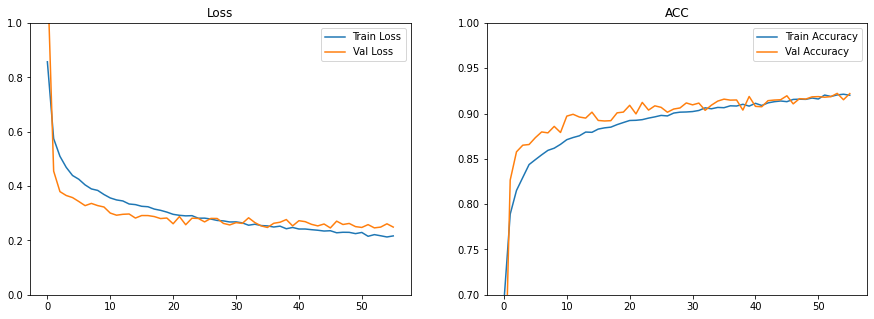

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()